# Machine learning workflow demo

## Predicting house prices with California data

## Load libs

In [1]:
import warnings
warnings.simplefilter("ignore")
%run -i calhousing.py
%matplotlib inline

Loading BokehJS ...

## Inspect data in source format

In [2]:
!head data/cal_housing_small.data
!wc data/cal_housing_small.data

longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,medianHouseValue
-120.58,35.0,37.0,523.0,119.0,106300.0
-118.17,33.98,31.0,1236.0,329.0,155400.0
-122.22,37.81,52.0,1971.0,335.0,273700.0
-117.91,33.66,21.0,1708.0,505.0,193800.0
-121.92,37.24,27.0,1265.0,216.0,281200.0
-117.01,32.71,20.0,3506.0,692.0,129100.0
-116.39,34.15,15.0,5583.0,1149.0,73300.0
-120.67,35.5,15.0,2752.0,546.0,175000.0
-118.18,34.04,36.0,1807.0,630.0,129000.0
  501   501 20363 data/cal_housing_small.data


## Load data in Python's memory

In [3]:
d = pd.read_csv("data/cal_housing_small.data")
print (d.shape)
d.head()

(500, 6)


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,medianHouseValue
0,-120.58,35.00,37.0,523.0,119.0,106300.0
1,-118.17,33.98,31.0,1236.0,329.0,155400.0
2,-122.22,37.81,52.0,1971.0,335.0,273700.0
3,-117.91,33.66,21.0,1708.0,505.0,193800.0
4,-121.92,37.24,27.0,1265.0,216.0,281200.0


## Show house locations on map

observa como el valor de las casas es más caro en zonas urbanas

In [5]:
ds = d.sample(500)
plot_map(ds["latitude"].values, 
         ds["longitude"].values, ds["medianHouseValue"].values.reshape(-1,1)/1e5) 

## Separate variable to predict

In [6]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
print (X.shape, y.shape)

(500, 5) (500,)


Split data from train and test

In [7]:
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
print (Xtr.shape, ytr.shape)
print (Xts.shape, yts.shape)

(350, 5) (350,)
(150, 5) (150,)


Create model with train data

In [8]:
from sklearn.svm import SVC
dt = DecisionTreeRegressor()
dt = SVC()
dt.fit(Xtr,ytr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Measure performance

In [9]:
print ("train score", rel_rmse(dt, Xtr, ytr))
print ("test score ", rel_rmse(dt, Xts, yts))

train score 0.0
test score  2.1853096131313823


## Plot geographical distribution of errors

- limit errors to <1

In [10]:
preds = dt.predict(Xts)
errs = np.abs(preds-yts)/yts
errs[errs>1] = 1
plot_map(Xts[:,1], Xts[:,0], errs.reshape(-1,1))

## Make a parameter search

In [11]:
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
best

mean_fit_time              0.000666165
std_fit_time               1.73055e-05
mean_score_time            7.69138e-05
std_score_time             2.66176e-06
param_max_depth                      7
params                {'max_depth': 7}
split0_test_score             0.404991
split1_test_score               0.4637
split2_test_score              0.41852
split3_test_score             0.418213
split4_test_score             0.547473
split5_test_score             0.448752
split6_test_score             0.388225
split7_test_score             0.451547
split8_test_score             0.384182
split9_test_score             0.419642
mean_test_score               0.434524
std_test_score               0.0451604
rank_test_score                     19
split0_train_score            0.192292
split1_train_score            0.287821
split2_train_score            0.206624
split3_train_score            0.220411
split4_train_score            0.300404
split5_train_score            0.239708
split6_train_score       

In [12]:
r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000563,0.000258,0.000158,3.352770e-05,1,{'max_depth': 1},0.682824,0.497395,0.566530,0.628341,...,0.605847,0.593575,0.601340,0.634560,0.626456,0.612894,0.603775,0.607099,0.610212,0.013474
1,0.000458,0.000046,0.000109,1.171448e-05,2,{'max_depth': 2},0.624185,0.469594,0.515386,0.578889,...,0.547818,0.552997,0.563133,0.593574,0.553241,0.562446,0.534311,0.538201,0.556516,0.016749
2,0.000468,0.000047,0.000095,2.166930e-05,3,{'max_depth': 3},0.506541,0.463139,0.460848,0.582567,...,0.433806,0.522042,0.516395,0.542361,0.441690,0.455764,0.452606,0.499189,0.486130,0.039577
3,0.000454,0.000032,0.000080,2.428418e-05,4,{'max_depth': 4},0.440022,0.476280,0.432783,0.554249,...,0.377115,0.470068,0.454494,0.500343,0.378802,0.373721,0.380624,0.456276,0.426313,0.050996
4,0.000524,0.000022,0.000074,2.374750e-06,5,{'max_depth': 5},0.411942,0.449560,0.416108,0.429296,...,0.312966,0.339565,0.409283,0.427520,0.316427,0.318352,0.314087,0.392533,0.357294,0.048910
5,0.000592,0.000011,0.000076,3.703094e-06,6,{'max_depth': 6},0.405466,0.454726,0.384603,0.409975,...,0.243408,0.273129,0.359011,0.307779,0.256450,0.253527,0.258951,0.296520,0.286735,0.044871
6,0.000666,0.000017,0.000077,2.661760e-06,7,{'max_depth': 7},0.404991,0.463700,0.418520,0.418213,...,0.206624,0.220411,0.300404,0.239708,0.202668,0.208454,0.179591,0.240215,0.227819,0.037767
7,0.000725,0.000009,0.000077,2.119245e-06,8,{'max_depth': 8},0.424954,0.432176,0.438058,0.442527,...,0.155053,0.175470,0.249580,0.170447,0.159462,0.166192,0.141869,0.177283,0.175860,0.033896
8,0.000793,0.000026,0.000081,4.095321e-06,9,{'max_depth': 9},0.457247,0.482592,0.390955,0.425278,...,0.105417,0.128640,0.191847,0.114409,0.111591,0.130683,0.101731,0.127283,0.126329,0.030164
9,0.000837,0.000016,0.000080,1.815116e-06,10,{'max_depth': 10},0.475129,0.473255,0.341239,0.417951,...,0.068060,0.084271,0.148952,0.079700,0.078122,0.097414,0.074462,0.077125,0.088061,0.026884


## Use learning curves to assess performance


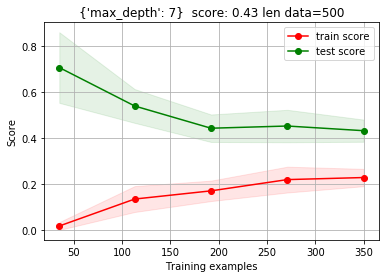

In [13]:
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## We obtained models with LOTS of variance!!! $\rightarrow$ increase data to 1k

In [14]:
d = pd.read_csv("data/cal_housing.data").sample(1000)
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
print(X.shape, y.shape)
d.head()

(1000, 5) (1000,)


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,medianHouseValue
4271,-118.33,34.10,45.0,1913.0,696.0,237500.0
14910,-117.05,32.61,31.0,4033.0,715.0,139900.0
11297,-117.91,33.79,22.0,4417.0,1054.0,170300.0
3863,-118.45,34.16,22.0,4982.0,1358.0,272600.0
6457,-118.06,34.11,36.0,2178.0,485.0,239500.0


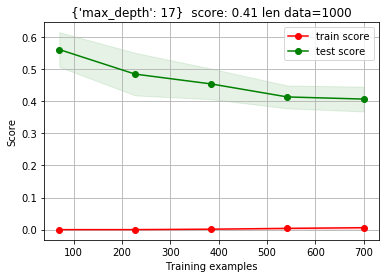

In [15]:
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## increase data until 10k 

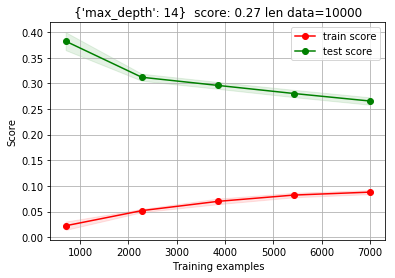

In [16]:

d = pd.read_csv("data/cal_housing.data").sample(10000)
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## increase data until 20k (all available) 

- smaller increase
- very little variability
- still large variance!!!

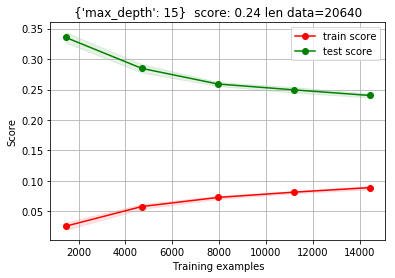

In [17]:
d = pd.read_csv("data/cal_housing.data")
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## no more data available. let's try to add more information

- not much increase!!!


In [18]:
d = pd.read_csv("data/cal_housing_full.data")
d.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


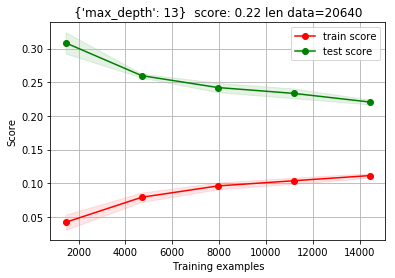

In [19]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## Let's observe geographical error distribution

In [20]:
d = pd.read_csv("data/cal_housing_full.data")
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()

Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(Xtr,ytr)
print("train score", rel_rmse(dt, Xtr, ytr))
print("test score ", rel_rmse(dt, Xts, yts))
preds = dt.predict(Xts)
errs = np.abs(preds-yts)/yts
errs[errs>1]=1
plot_map(Xts[:3000,1], Xts[:3000,0], errs.reshape(-1,1))

train score 0.1761015897800742
test score  0.23464818793055622


## We now use this model to predict the price of a new house

In [21]:
newh = [[-118.22, 37.4, 10, 5000, 550, 8000, 200000, 3.5]]
dt.predict(newh)

array([156890.90909091])

## Understand our model's response to each variable

In [22]:
d = pd.read_csv("data/cal_housing_full.data").sample(20000)

nsamples = 1000
ncols = len(d.columns)-1
sample = np.random.random(size=(nsamples, ncols))
sample = (sample*20.).astype(int)/20.
dsample = pd.DataFrame(sample, columns=d.columns[:-1])
for i in d.columns[:-1]:
    dsample[i] = MinMaxScaler(feature_range=(np.min(d[i]), np.max(d[i]))).fit_transform(dsample[i].values.reshape(-1,1))

plot_map(dsample["latitude"], dsample["longitude"], dt.predict(sample).reshape(-1,1)/1e5, size=5)

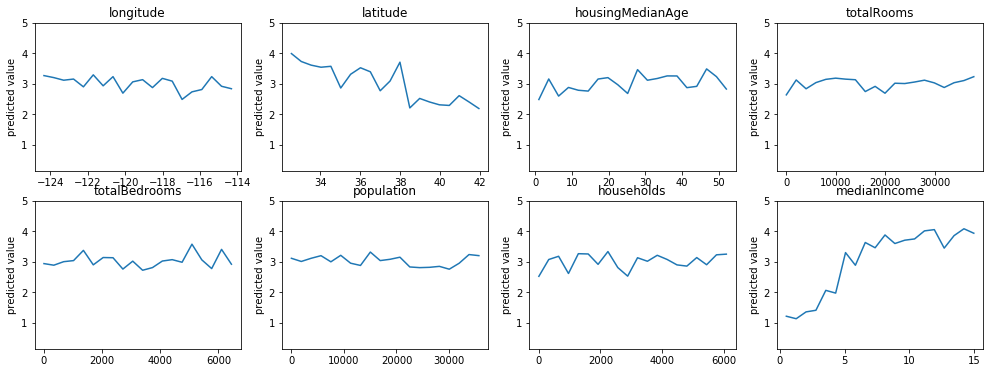

In [23]:
fig = plt.figure(figsize=(17,6))
c = 1
for col in dsample.columns:
    fig.add_subplot(2,4,c)
    c+=1
    x,y = [], []
    for i in np.unique(dsample[col]):
        x.append(i)

        dx = dsample[dsample[col]==i]
        y.append(np.mean(dt.predict(dx)/1e5))
    plt.plot(x,y)
    plt.ylabel("predicted value")
    plt.ylim(np.min(d["medianHouseValue"])/1e5, np.max(d["medianHouseValue"])/1e5)
    plt.title(col)
    

## Try using only visually meaningful columns

- another increase
- still variance

In [24]:
dfull = pd.read_csv("data/cal_housing_full.data")
d = dfull[["longitude", "latitude", "medianIncome", "medianHouseValue"]]
d.shape


(20640, 4)

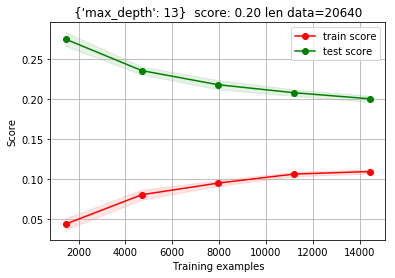

In [25]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

In [26]:
for i,col in enumerate(dfull.columns):
    if col!="medianHouseValue":
        print ("%20s %.3f"%(col, dt.feature_importances_[i]))

           longitude 0.152
            latitude 0.147
    housingMedianAge 0.055
          totalRooms 0.013
       totalBedrooms 0.021
          population 0.025
          households 0.011
        medianIncome 0.576
